# 1.数据预处理


### 读入数据

In [1]:
import pandas as pd
data=pd.read_csv('apple_quality.csv')
data

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good
...,...,...,...,...,...,...,...,...,...
3995,3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784,bad
3996,3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235,good
3997,3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611,bad
3998,3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229720,good


该数据集包含苹果的各种属性的信息，包括水果ID、大小、重量、甜度、松脆度、多汁性、成熟度、酸度和品质等详细信息

### 删除重复数据，检查是否有缺失值

In [2]:
#删除重复数据
data.drop_duplicates(inplace=True)
#检查是否有缺失值
print(data.isna().sum())

A_id           0
Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64


# 2.数据探索

### 查看数据类型

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   int64  
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 281.4+ KB


### 苹果品质分布情况

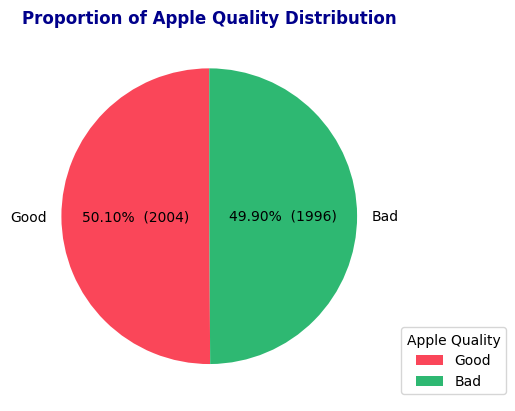

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from string import ascii_letters

# 同时显示数值和占比
def make_autopct(values):
    def my_autopct(pct):
        total=sum(values)
        val=int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct
#饼图
plt.pie(data['Quality'].value_counts(),
        colors=["#fa4659","#2eb872"],
        labels=['Good','Bad'],
        autopct=make_autopct(data['Quality'].value_counts()),
        pctdistance=0.5,
        startangle=90)

plt.legend(labels=['Good','Bad'],
           title="Apple Quality",
          loc="lower left",
          bbox_to_anchor=(1, 0, 0.5, 1),
          )

plt.title("Proportion of Apple Quality Distribution",
          fontweight = "bold", color = "darkblue")
plt.show()

好品质的苹果与坏品质的苹果分布均衡

### 单变量分析 不同属性下苹果的分布

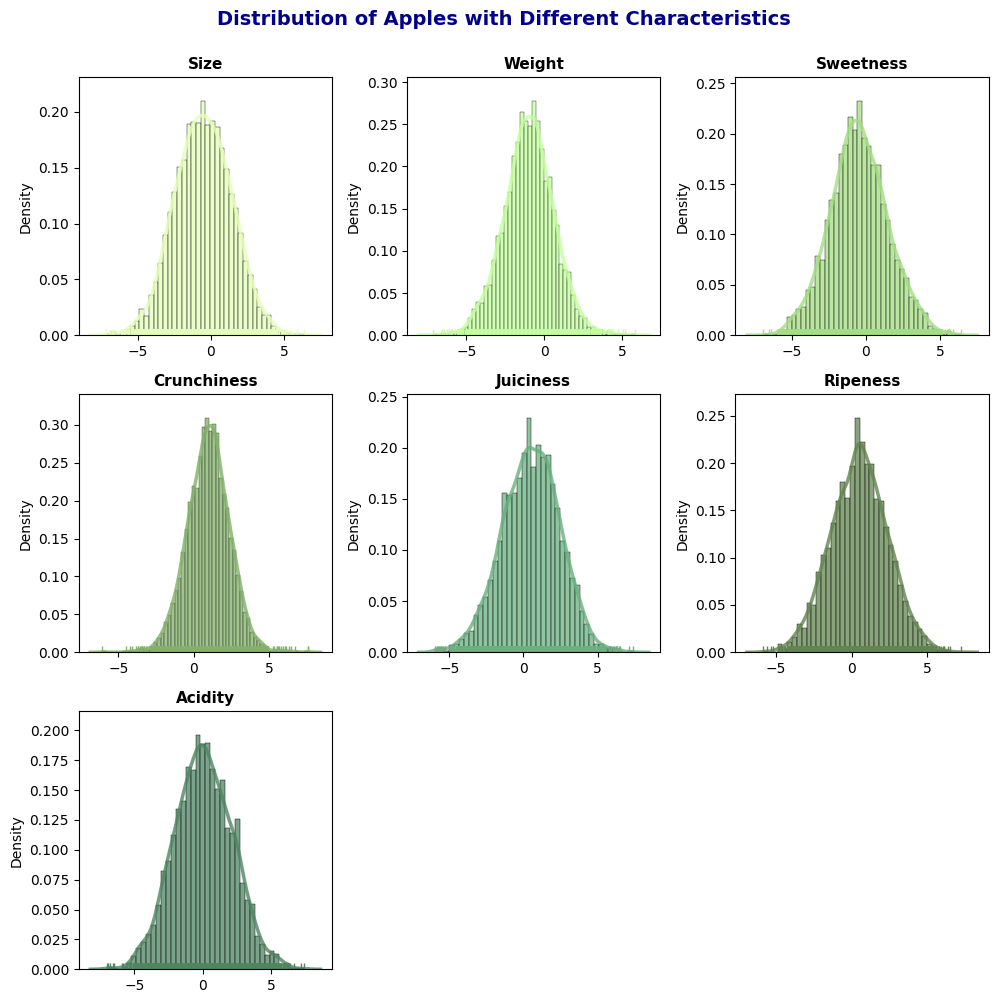

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

cols=data.columns.to_list()[1:-1]
fig,axs=plt.subplots(nrows=3,ncols=3,figsize=(10,10))
axs=axs.flat
colors=['#e4ffb8','#c3ff9d','#a3de82','#82b169','#69b17f','#62854f','#4f8561']
for i,col in enumerate(cols):
    sns.kdeplot(data, x = col, alpha = 0.8, linewidth = 2.5, color = colors[i], ax = axs[i])
    sns.histplot(data, x = col, stat = 'density', color = colors[i], ax = axs[i])
    sns.rugplot(data, x = col, color = colors[i], ax = axs[i])
    axs[i].set_xlabel("")
    axs[i].set_title(col, fontsize = 11, fontweight = "bold", color = "black")
fig.suptitle("Distribution of Apples with Different Characteristics", fontsize = 14, fontweight = "bold", color = "darkblue", y = 0.998)
for ax in axs[7:]:
    fig.delaxes(ax)
fig.tight_layout()
plt.show()

### 成对特征图表 查看不同特征之间的关系

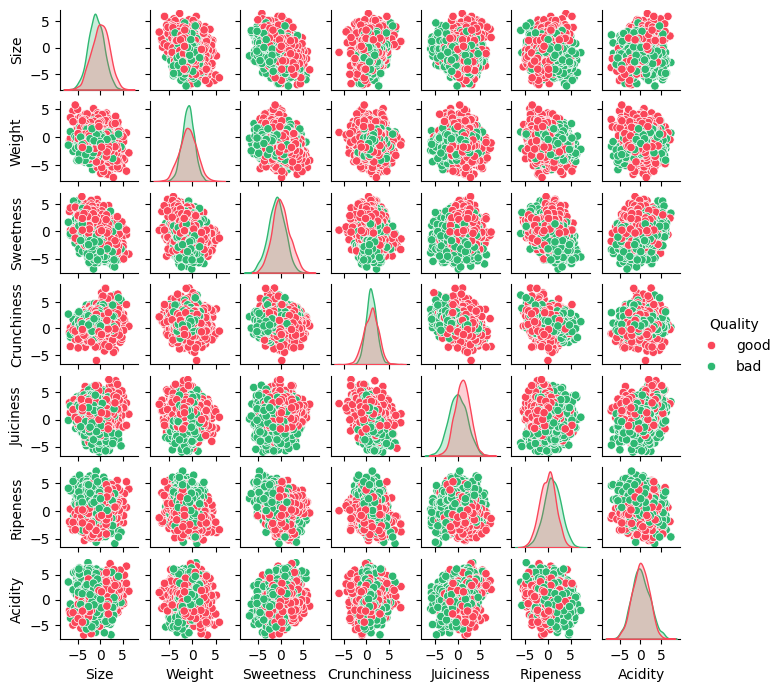

In [7]:
cols=data.columns.to_list()[1:-1]
sns.pairplot(data,
             hue='Quality',
             palette=["#fa4659","#2eb872"],
             vars=cols,
             height=1)
plt.show()

可以看到没有一对变量呈现相关性

### 小提琴图 每个数值变量相对于目标变量（苹果品质）的分布

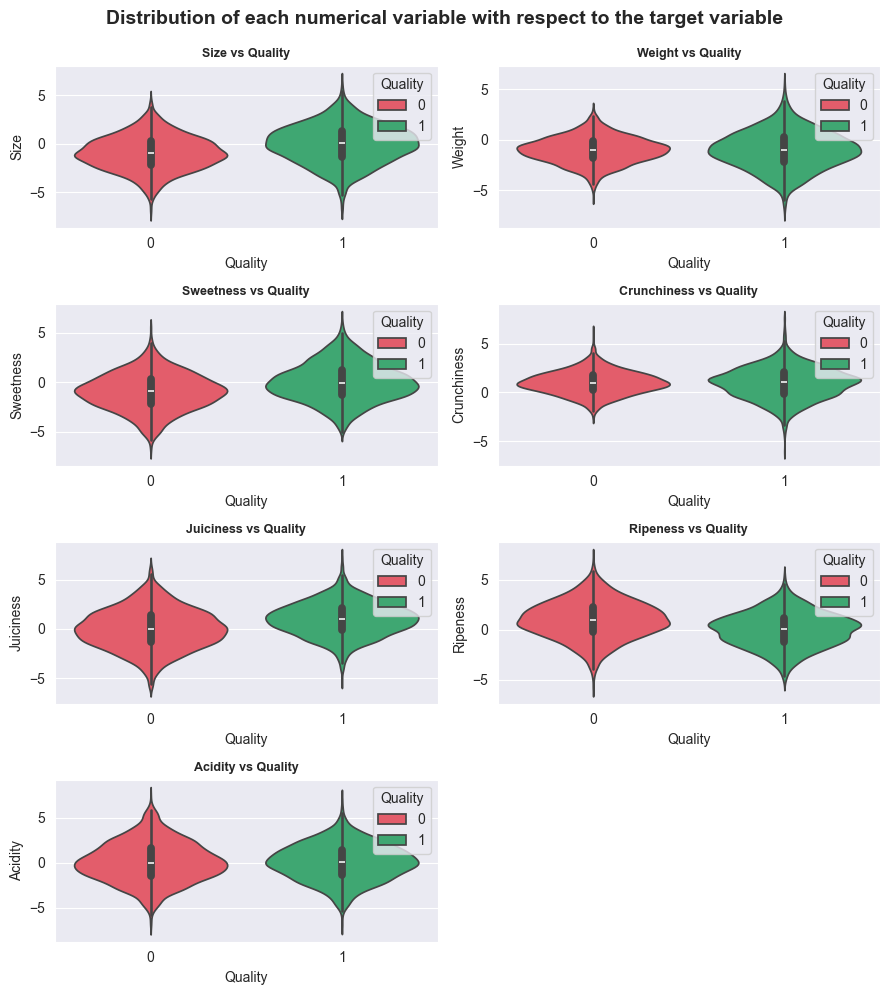

In [33]:
cols=data.columns.to_list()[1:-1]
fig,axs = plt.subplots(nrows = 4, ncols = 2, figsize = (9,10))
sns.set_style('darkgrid')
axs = axs.flat
for i,col in enumerate(cols):
    sns.violinplot(data,
                   hue='Quality',
                   x='Quality',
                   y=col,ax=axs[i],
                   palette=["#fa4659","#2eb872"])
    axs[i].set_title(f'{col} vs Quality', fontsize=9, fontweight="bold")
fig.suptitle("Distribution of each numerical variable with respect to the target variable", fontsize = 14, fontweight = 'bold', y = 0.99)
fig.delaxes(ax = axs[7])
fig.tight_layout()
plt.show()

# 3.特征工程

### 特征相关性热力图

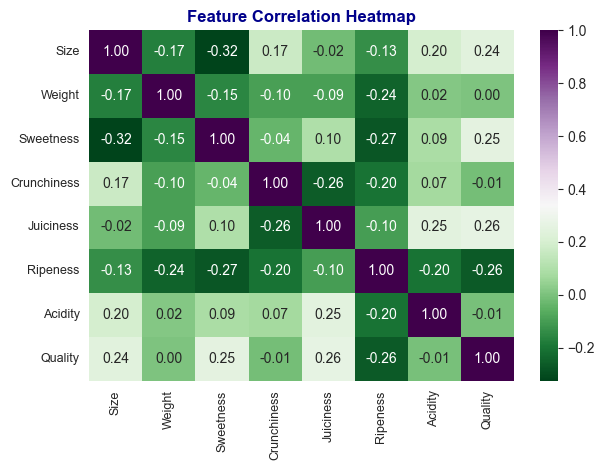

In [11]:
# 将文本型数据转换为数值型数据
data['Quality']=data['Quality'].apply(lambda x:1 if x=='good' else 0)
#去除无关列
data=data.drop(['A_id'],axis=1)
#计算相关系数
corr=data.corr()
#绘制特征关系图
sns.heatmap(corr,
            cmap='PRGn_r',
            annot=True,
            fmt='.2f',
            xticklabels=1,
            yticklabels=1)
            # linewidths=0.5)
plt.xticks(rotation=90, fontsize=9)
plt.yticks(rotation=0, fontsize=9)
plt.title('Feature Correlation Heatmap',
          fontweight = "bold", color = "darkblue")
plt.tight_layout()
plt.show()

根据相关矩阵，没有一对变量表现出很强的相关性

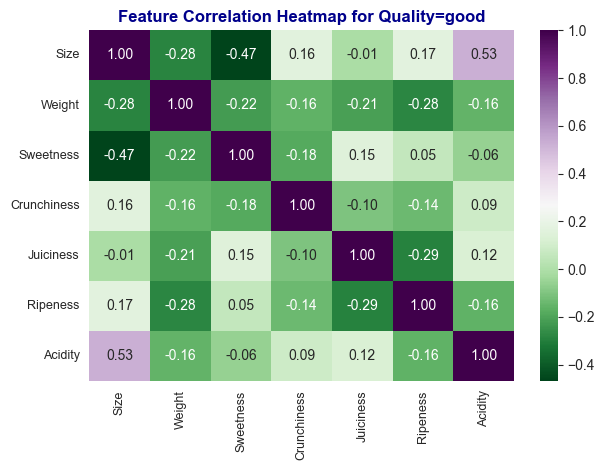

In [36]:
# 筛选Quality 列中的值为 'good' 的数据
good_quality_data = data[data['Quality'] ==1]
# 去除无关列
good_quality_data = good_quality_data.drop(['A_id','Quality'], axis=1)
# 计算相关系数
corr_good_quality = good_quality_data.corr()
# 绘制特征关系图
sns.heatmap(corr_good_quality,
            cmap='PRGn_r',
            annot=True,
            fmt='.2f',
            xticklabels=1,
            yticklabels=1)
plt.xticks(rotation=90, fontsize=9)
plt.yticks(rotation=0, fontsize=9)
plt.title('Feature Correlation Heatmap for Quality=good',
          fontweight="bold", color="darkblue")
plt.tight_layout()
plt.show()


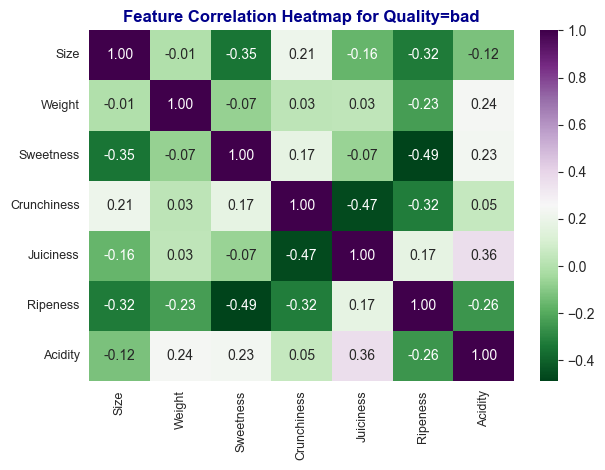

In [37]:
# 筛选Quality 列中的值为 'bad' 的数据
good_quality_data = data[data['Quality'] ==0]
# 去除无关列
good_quality_data = good_quality_data.drop(['A_id','Quality'], axis=1)
# 计算相关系数
corr_good_quality = good_quality_data.corr()
# 绘制特征关系图
sns.heatmap(corr_good_quality,
            cmap='PRGn_r',
            annot=True,
            fmt='.2f',
            xticklabels=1,
            yticklabels=1)
plt.xticks(rotation=90, fontsize=9)
plt.yticks(rotation=0, fontsize=9)
plt.title('Feature Correlation Heatmap for Quality=bad',
          fontweight="bold", color="darkblue")
plt.tight_layout()
plt.show()

# 4.数据建模

### 评估模型性能 比较不同类型分类器

In [24]:
import numpy as np
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, \
    classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv('apple_quality.csv')
data['Quality']=data['Quality'].apply(lambda x:1 if x=='good' else 0)

#划分数据集，80%用于训练，20%用于测试
train_df, test_df = train_test_split(data, test_size=0.2, random_state=42)

#选择用于预测的特征列
feature_columns=['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']

#训练集的输入特征
X_train = train_df[feature_columns]
#测试集的输入特征
X_test = test_df[feature_columns]

#训练集的标签
y_train = train_df['Quality']
#测试集的标签
y_test = test_df['Quality']

#数据标准化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 比较不同类型分类器
classifiers = [
    SVC(probability=True,random_state=42),
    LogisticRegression(random_state=42),
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(random_state=42),
    GaussianNB(),
    KNeighborsClassifier()
]

accuracy_values = []
f1_values = []
recall_values = []
precision_values = []
roc_curves = []

for clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_prob = clf.predict_proba(X_test)[:, 1]

    fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_prob)
    roc_curves.append((fpr_logreg, tpr_logreg, clf.__class__.__name__))

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    accuracy_values.append(accuracy)
    f1_values.append(f1)
    recall_values.append(recall)
    precision_values.append(precision)

    conf_matrix = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    print(f'\nClassifier: {clf.__class__.__name__}')
    print(f'Accuracy: {accuracy:.2f}')
    # print(f"F1 Score: {f1:.2f}")
    # print(f"Recall: {recall:.2f}")
    # print(f"Precision: {precision:.2f}")
    print('Confusion Matrix:')
    print(conf_matrix)
    print('Classification Report:')
    print(classification_rep)
    print('----------------------------' )


Classifier: SVC
Accuracy: 0.91
Confusion Matrix:
[[362  39]
 [ 35 364]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.90      0.91       401
           1       0.90      0.91      0.91       399

    accuracy                           0.91       800
   macro avg       0.91      0.91      0.91       800
weighted avg       0.91      0.91      0.91       800

----------------------------

Classifier: LogisticRegression
Accuracy: 0.75
Confusion Matrix:
[[303  98]
 [ 99 300]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.76      0.75       401
           1       0.75      0.75      0.75       399

    accuracy                           0.75       800
   macro avg       0.75      0.75      0.75       800
weighted avg       0.75      0.75      0.75       800

----------------------------

Classifier: DecisionTreeClassifier
Accuracy: 0.81
Confusion Matrix:
[[324  77]
 

### 可视化 SVC 对于网格搜索各个参数经过交叉验证之后的准确率

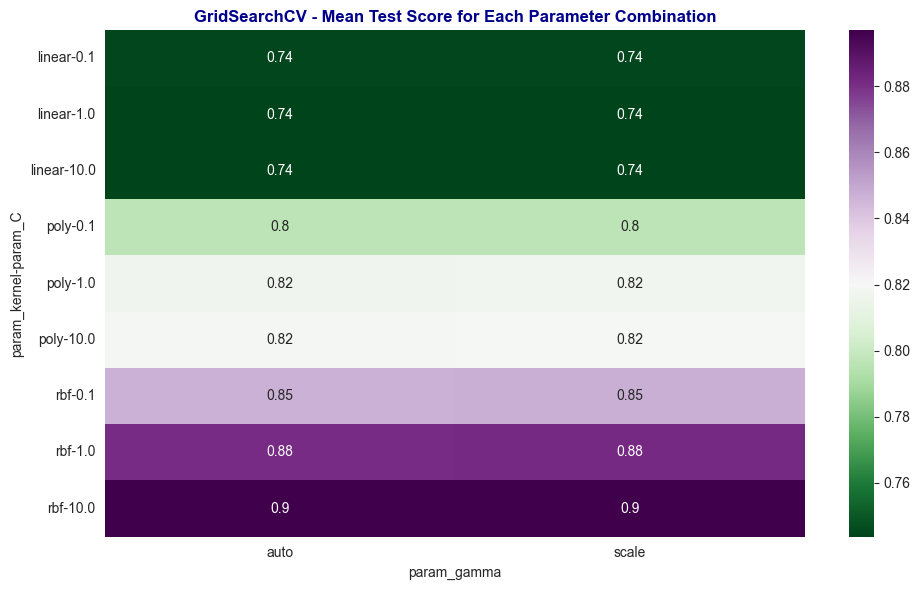

In [25]:
#创建一个SVM分类器
clf = SVC(probability=True)
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf'],
    'gamma': ['scale', 'auto']
}
grid_search_svm = GridSearchCV(clf, param_grid_svm, cv=3)
grid_search_svm.fit(X_train_scaled, y_train)
best_params_svm = grid_search_svm.best_params_
#训练模型
best_clf = grid_search_svm.best_estimator_
best_clf.fit(X_train_scaled, y_train)
#在测试集上进行预测
y_pred = best_clf.predict(X_test_scaled)

cv_results = pd.DataFrame(grid_search_svm.cv_results_)[['param_C', 'param_kernel', 'param_gamma', 'mean_test_score']]
pivot_table = cv_results.pivot_table(index=['param_kernel', 'param_C'], columns='param_gamma', values='mean_test_score')

# 可视化参数网格搜索过程
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='PRGn_r', cbar=True)
plt.title('GridSearchCV - Mean Test Score for Each Parameter Combination',fontweight = "bold", color = "darkblue")
plt.tight_layout()
plt.show()

在进行参数网格搜索后，观察到在 gamma='auto' 或 gamma='scale' 和 kernel='rbf' 以及 C=10.0 的情况下取得了最大的数值，模型性能最好。

# 5.结果评估

## 以准确率 (Accuracy)、精度 (Precision)、召回率 (Recall)、F1分数 (F1 Score)、ROC曲线 (Receiver Operating Characteristic curve)为评估指标

### 可视化上述常用分类算法在苹果好坏分类任务中 Accuracy、Precision、Recall、F1-score 的值

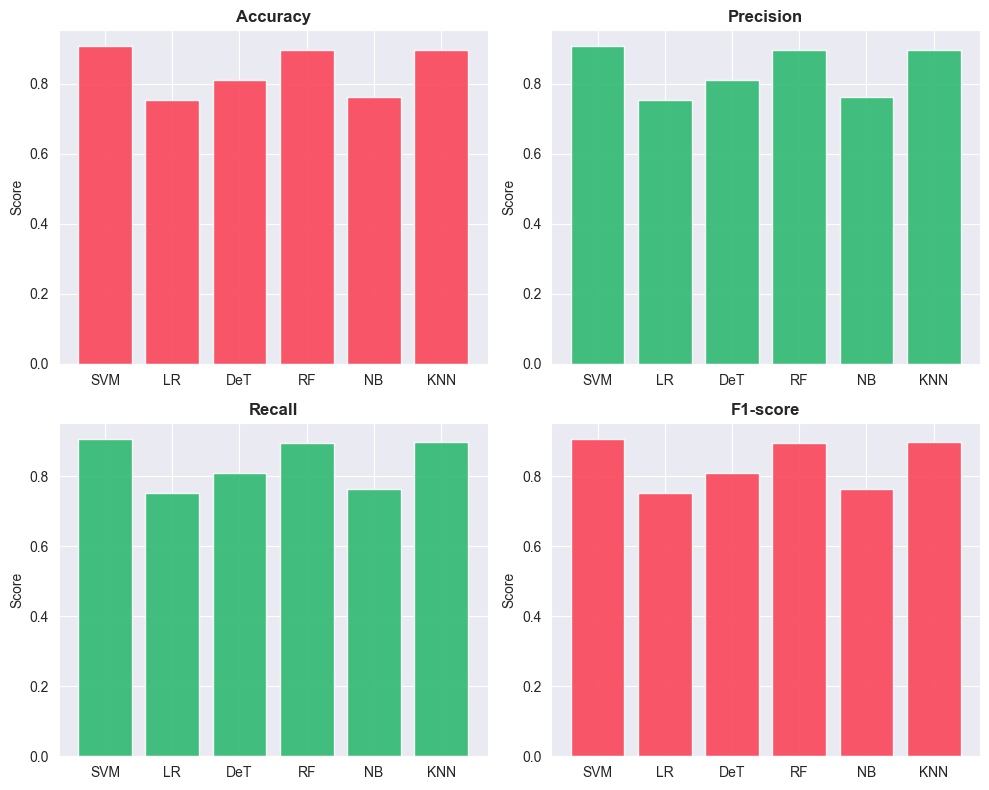

In [26]:
algo_names = ['SVM', 'LR', 'DeT', 'RF', 'NB', 'KNN']

# 设置图形的排列方式
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

bar_alpha=0.9
font_weight = 'bold'
# 绘制每种指标的条形图
axs[0, 0].bar(algo_names, accuracy_values,color="#fa4659",alpha=bar_alpha)
axs[0, 0].set_title('Accuracy', fontweight=font_weight)
axs[0, 0].set_ylabel('Score')

axs[0, 1].bar(algo_names, precision_values,color="#2eb872",alpha=bar_alpha)
axs[0, 1].set_title('Precision',fontweight=font_weight)
axs[0, 1].set_ylabel('Score')

axs[1, 0].bar(algo_names, recall_values,color="#2eb872",alpha=bar_alpha)
axs[1, 0].set_title('Recall', fontweight=font_weight)
axs[1, 0].set_ylabel('Score')

axs[1, 1].bar(algo_names, f1_values,color="#fa4659",alpha=bar_alpha)
axs[1, 1].set_title('F1-score', fontweight=font_weight)
axs[1, 1].set_ylabel('Score')

plt.tight_layout()
plt.show()

### roc图

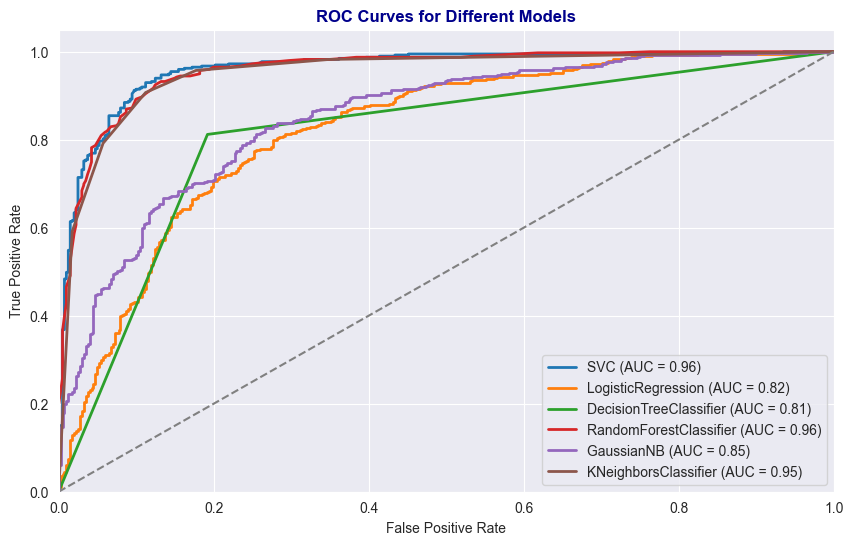

In [28]:
plt.figure(figsize=(10, 6))
for fpr, tpr, model in roc_curves:
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{model} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models',
          fontweight = "bold", color = "darkblue")
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

综合来看， SVC在这些指标中表现较好